# Titanic Dataset

Data Dictionary
Variable--> Definition	Key
survival-->	Survival	
            0 = No, 
            1 = Yes
pclass	--> Ticket class

            1 = 1st, 
            2 = 2nd, 
            3 = 3rd
sex	    --> Sex	
Age	    --> Age in years	
sibsp	--> of siblings / spouses aboard the Titanic	
parch	--> of parents / children aboard the Titanic	
ticket	--> Ticket number	
fare	--> Passenger fare	
cabin	--> Cabin number	
embarked-->	Port of Embarkation	
            C = Cherbourg, 
            Q = Queenstown, 
            S = Southampton

Variable Notes

pclass: A proxy for socio-economic status (SES)
        1st = Upper
        2nd = Middle
        3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.



# Importing Required Libraries & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

# Cleaning Dataset

In [4]:
df = df.drop("PassengerId", axis = 1)
df = df.drop("Name", axis = 1)
df = df.drop("SibSp", axis = 1)
df = df.drop("Parch", axis = 1)
df = df.drop("Cabin", axis = 1)
df = df.drop("Embarked", axis = 1)
df = df.drop("Ticket", axis = 1)

In [5]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [7]:
df.count()

Survived    891
Pclass      891
Sex         891
Age         714
Fare        891
dtype: int64

In [8]:
df = df.dropna(axis = 0, how="any")

In [9]:
df.count()

Survived    714
Pclass      714
Sex         714
Age         714
Fare        714
dtype: int64

In [10]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

# Converting Categorical to Numerical Data

In [11]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [12]:
df["Sex"] = pd.get_dummies(df["Sex"])

In [13]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


# Plotting Graphs between Features and Label

In [14]:
df["Sex"].value_counts()

0    453
1    261
Name: Sex, dtype: int64

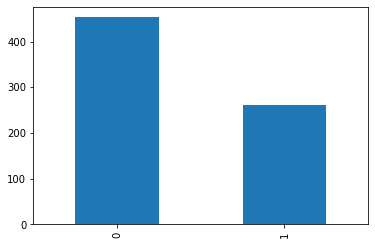

In [15]:
_ = df["Sex"].value_counts().plot(kind = "bar")

In [16]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


In [17]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [18]:
X.head()

,Pclass,Sex,Age,Fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


In [19]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Train-Test Split

In [20]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(535, 4)
(535,)
(179, 4)
(179,)


# KNN Algorithm Implementation

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knnmodel = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)
y_predict = knnmodel.predict(X_test)

In [24]:
KNN_Comparison = pd.DataFrame({
    "Actual" : y_test,
    "Predicted" : y_predict
})

In [25]:
KNN_Comparison

,Actual,Predicted
526,1,1
427,1,1
635,1,1
726,1,1
145,0,0
...,...,...
406,0,0
646,0,0
437,1,1
473,1,1


# Checking the Accuracy & Predicting New Data

In [26]:
from sklearn.metrics import accuracy_score
KNN_Accuracy = accuracy_score(y_test, y_predict)
KNN_Accuracy

0.8044692737430168

Predicting 3rd Lower class who is Male of the 39 years old whose Fare is USD 31.

In [27]:
knnmodel.predict([[3,0,39,31]])

array([1], dtype=int64)

The above prediction says 39 years Old Male has "Survived".

Making other Prediction a 12 years old Male from 2nd Middle Class whose Fare is USD 7.

In [28]:
knnmodel.predict([[2, 0, 12, 7]])

array([0], dtype=int64)

The above prediction says 12 years Old Male has " Not Survived".

# Logistic Regression Algorithm Implementation

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression().fit(X_train, y_train)
y_log_reg_predict = log_reg_model.predict(X_test)

In [30]:
Log_Reg_Comparison = pd.DataFrame({
    "Actual" : y_test,
    "Prediction" : y_log_reg_predict
})

In [31]:
Log_Reg_Comparison

,Actual,Prediction
526,1,1
427,1,1
635,1,1
726,1,1
145,0,0
...,...,...
406,0,0
646,0,0
437,1,1
473,1,1


# Checking Accuracy and Predicting New Data

In [32]:
from sklearn.metrics import accuracy_score
log_reg_Accuracy = accuracy_score(y_test, y_log_reg_predict)
log_reg_Accuracy

0.7932960893854749

In [33]:
log_reg_model.predict([[1,1,10,15]])

array([0], dtype=int64)

# SVM Algorithm Implementation

In [34]:
from sklearn.svm import SVC
svm_model = SVC().fit(X_train, y_train)

In [35]:
y_svm_prediction = svm_model.predict(X_test)

In [36]:
svm_Comparison = pd.DataFrame({
    "Actual" : y_test,
    "Predicted" : y_svm_prediction
})

In [37]:
svm_Comparison

,Actual,Predicted
526,1,1
427,1,1
635,1,1
726,1,1
145,0,0
...,...,...
406,0,0
646,0,0
437,1,1
473,1,1


In [38]:
from sklearn.metrics import accuracy_score
svm_accuracy = accuracy_score(y_test, y_svm_prediction)
svm_accuracy

0.7821229050279329

# Comparing Accuracies of 3 Models

In [39]:
Models = ["KNN Algorithm Accuracy", "Logistic Regression Accuracy", "SVM Algorithm Accuracy"]
Scores = [KNN_Accuracy*100, log_reg_Accuracy*100, svm_accuracy*100]
dict1 = {
    "Models Implemented" : Models,
    "Accuracy Scores" : Scores
}
Model_Comparison = pd.DataFrame(dict1, index=[1,2,3])
Model_Comparison

,Models Implemented,Accuracy Scores
1,KNN Algorithm Accuracy,80.446927
2,Logistic Regression Accuracy,79.329609
3,SVM Algorithm Accuracy,78.212291


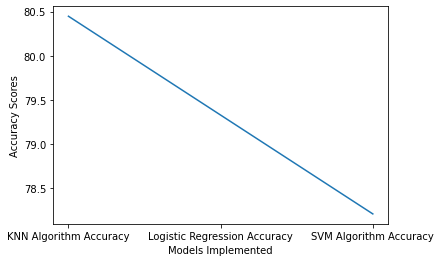

In [40]:
plt.xlabel("Models Implemented")
plt.ylabel("Accuracy Scores")
plt.plot(Model_Comparison["Models Implemented"], Model_Comparison["Accuracy Scores"])